# 1. Frequency Analysis & Bar Charts

In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import ast # To convert string representation of list back to list


In [2]:
df = pd.read_csv("south_korea_news_processed.csv")
    # Convert the 'processed_tokens' column from string back to list
df['processed_tokens'] = df['processed_tokens'].apply(ast.literal_eval)
print("Data loaded successfully.")

Data loaded successfully.


In [3]:
all_tokens = [token for sublist in df['processed_tokens'] for token in sublist]
print(f"Total tokens for analysis: {len(all_tokens)}")

Total tokens for analysis: 63922


In [4]:
fdist = FreqDist(all_tokens)

In [5]:
print("\nTop 20 Most Common Words:")
print(fdist.most_common(20))


Top 20 Most Common Words:
[('south', 1208), ('new', 469), ('trump', 447), ('korea', 387), ('president', 363), ('war', 333), ('world', 327), ('year', 292), ('ukraine', 291), ('country', 286), ('north', 281), ('korean', 266), ('day', 264), ('people', 248), ('state', 234), ('first', 207), ('africa', 200), ('china', 183), ('australia', 174), ('leader', 166)]


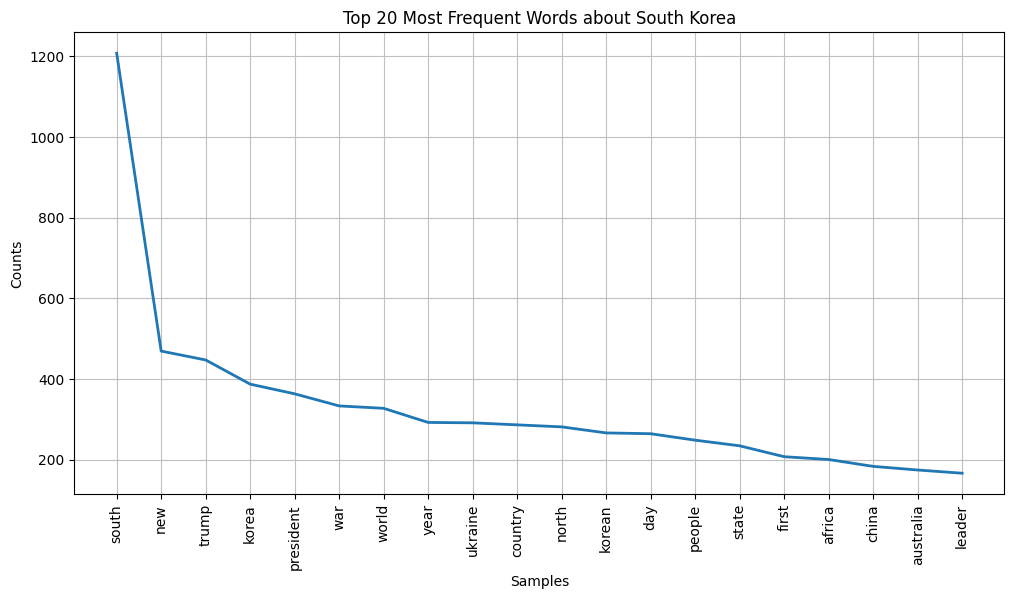

In [6]:
plt.figure(figsize=(12, 6))
fdist.plot(20, title='Top 20 Most Frequent Words about South Korea')
plt.show()

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



Generating Word Cloud...


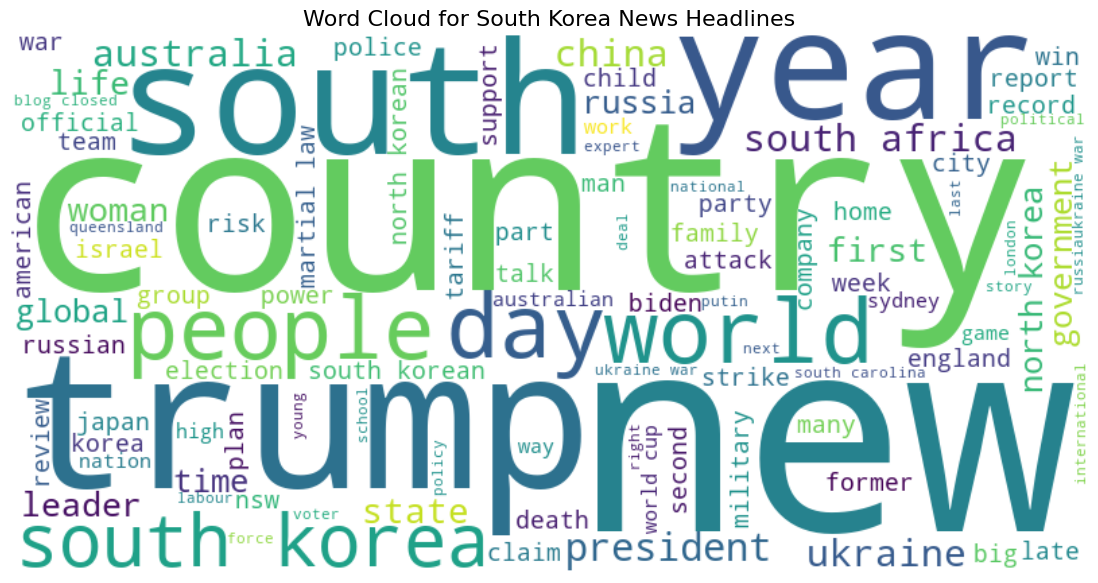

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check if there are tokens before creating word cloud
if all_tokens:
    # Join all tokens into a single string for the word cloud
    text_for_wordcloud = " ".join(all_tokens)

    print("\nGenerating Word Cloud...")
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100 # Show top 100 words
    ).generate(text_for_wordcloud)

    # --- Display the Word Cloud ---
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") # Hide axes
    plt.title("Word Cloud for South Korea News Headlines", size=16)
    plt.show()
else:
    print("No tokens found to generate a word cloud.")

In [10]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 4.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
Note: you may need to restart the kernel to use updated packages.


In [13]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis # You might need: pip install pyLDAvis

# Ensure we have lists of tokens
token_lists = df['processed_tokens'].tolist()
# Filter out any empty lists which can cause errors
token_lists = [tokens for tokens in token_lists if tokens]

if token_lists:
    print("\nPreparing data for Topic Modeling (LDA)...")
    # 1. Create Dictionary: Map words to IDs
    dictionary = corpora.Dictionary(token_lists)
    # Filter extremes (optional but recommended)
    dictionary.filter_extremes(no_below=5, no_above=0.7)

    # 2. Create Corpus: Convert docs to Bag-of-Words (BoW)
    corpus = [dictionary.doc2bow(tokens) for tokens in token_lists]

    print(f"Dictionary size: {len(dictionary)}")
    print(f"Corpus size: {len(corpus)}")

    # 3. Build LDA model
    print("Building LDA Model (this can take some time)...")
    NUM_TOPICS = 5 # Choose how many topics you expect (e.g., 5-10)
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=NUM_TOPICS,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )

    # 4. Print Topics
    print("\nLDA Topics Found:")
    topics = lda_model.print_topics(num_words=10) # Show top 10 words per topic
    for topic in topics:
        print(topic)

    # 5. Visualize (Optional but recommended)
    print("\nPreparing LDA Visualization (pyLDAvis)...")
    # This creates an interactive HTML visualization
    lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
    # To save it:
   
    # To display in Jupyter Notebook:
    pyLDAvis.display(lda_vis)
    print("LDA Visualization prepared. If not displayed automatically, check for 'lda_visualization.html' or ensure you're in a Jupyter environment.")

else:
    print("No token lists available for LDA modeling.")


Preparing data for Topic Modeling (LDA)...
Dictionary size: 2290
Corpus size: 4254
Building LDA Model (this can take some time)...

LDA Topics Found:
(0, '0.046*"south" + 0.041*"country" + 0.031*"year" + 0.028*"state" + 0.021*"people" + 0.016*"power" + 0.013*"city" + 0.013*"many" + 0.012*"israel" + 0.011*"candidate"')
(1, '0.019*"court" + 0.017*"election" + 0.014*"united" + 0.014*"monday" + 0.014*"woman" + 0.012*"tuesday" + 0.012*"thursday" + 0.011*"student" + 0.010*"work" + 0.010*"crisis"')
(2, '0.055*"trump" + 0.037*"korea" + 0.034*"korean" + 0.032*"north" + 0.027*"tariff" + 0.024*"president" + 0.022*"china" + 0.021*"war" + 0.020*"ukraine" + 0.015*"official"')
(3, '0.050*"south" + 0.047*"new" + 0.033*"world" + 0.029*"president" + 0.024*"law" + 0.023*"korea" + 0.018*"martial" + 0.018*"leader" + 0.016*"late" + 0.016*"first"')
(4, '0.029*"military" + 0.022*"former" + 0.020*"foreign" + 0.018*"kim" + 0.016*"political" + 0.015*"administration" + 0.015*"government" + 0.015*"second" + 0.013

In [ ]:
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')

In [12]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 3.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
